# Data set Context

The CalCOFI data set represents the longest (1949-present) and most complete (more than 50,000 sampling stations) time series of oceanographic and larval fish data in the world. It includes abundance data on the larvae of over 250 species of fish; larval length frequency data and egg abundance data on key commercial species; and oceanographic and plankton data. The physical, chemical, and biological data collected at regular time and space intervals quickly became valuable for documenting climatic cycles in the California Current and a range of biological responses to them. CalCOFI research drew world attention to the biological response to the dramatic Pacific-warming event in 1957-58 and introduced the term “El Niño” into the scientific literature.

The California Cooperative Oceanic Fisheries Investigations (CalCOFI) are a unique partnership of the California Department of Fish & Wildlife, NOAA Fisheries Service and Scripps Institution of Oceanography. The organization was formed in 1949 to study the ecological aspects of the sardine population collapse off California. Today our focus has shifted to the study of the marine environment off the coast of California, the management of its living resources, and monitoring the indicators of El Nino and climate change. CalCOFI conducts quarterly cruises off southern & central California, collecting a suite of hydrographic and biological data on station and underway. Data collected at depths down to 500 m include: temperature, salinity, oxygen, phosphate, silicate, nitrate and nitrite, chlorophyll, transmissometer, PAR, C14 primary productivity, phytoplankton biodiversity, zooplankton biomass, and zooplankton biodiversity.

# Task  : 
In this project we investigate the relationship between water salinity and water temperature. Also we predict the change of salinity based on water temperature.

# Imorting All Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error,max_error

**Importing Data Set** : 
Importing dataset from downloaded file on System using Pandas package

In [2]:
original_data = pd .read_csv( "C:\\Users\\SS\\Downloads\\MDS Course files\\Projects\\Data Sets\\calcofi ULR & MLR\\bottle.csv" )

C:\Users\SS\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
original_data .head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


This Shows Data has 74 columns. But we dont know the no. of entries. So, We find **SHAPE** of the data

In [4]:
original_data .shape

(864863, 74)

This dataset has 864863 enteries/rows and 74 features/columns

### Info on features/columns of the Data set

In [5]:
original_data .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 74 columns):
Cst_Cnt                864863 non-null int64
Btl_Cnt                864863 non-null int64
Sta_ID                 864863 non-null object
Depth_ID               864863 non-null object
Depthm                 864863 non-null int64
T_degC                 853900 non-null float64
Salnty                 817509 non-null float64
O2ml_L                 696201 non-null float64
STheta                 812174 non-null float64
O2Sat                  661274 non-null float64
Oxy_µmol/Kg            661268 non-null float64
BtlNum                 118667 non-null float64
RecInd                 864863 non-null int64
T_prec                 853900 non-null float64
T_qual                 23127 non-null float64
S_prec                 817509 non-null float64
S_qual                 74914 non-null float64
P_qual                 673755 non-null float64
O_qual                 184676 non-null float64
SThtaq  

Result of this code shows 65 features are of float data type , 5 are of int data type and 4 are objects.

### Statistical Information of the Data set

In [6]:
original_data .describe()

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,...,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1
count,864863.000000,864863.000000,864863.000000,853900.000000,817509.000000,696201.000000,812174.000000,661274.000000,661268.000000,118667.000000,...,225276.000000,225275.000000,864863.000000,122006.000000,1999.000000,224.000000,2084.000000,234.000000,10.000000,84.000000
mean,17138.790958,432432.000000,226.831951,10.799677,33.840350,3.392468,25.819394,57.103779,148.808694,10.497426,...,0.450225,0.198599,228.395694,162.071521,2153.239714,2168.148330,2256.055845,2278.858803,7.948570,7.910983
std,10240.949817,249664.587267,316.050259,4.243825,0.461843,2.073256,1.167787,37.094137,90.187533,6.189688,...,1.208566,0.376539,319.456731,85.722796,112.995202,154.852332,34.844435,58.496495,0.021216,0.077666
min,1.000000,1.000000,0.000000,1.440000,28.431000,-0.010000,20.934000,-0.100000,-0.434900,0.000000,...,-0.010000,-3.890000,0.000000,0.000000,1948.850000,1969.440000,2181.570000,2198.150000,7.923100,7.618300
25%,8269.000000,216216.500000,46.000000,7.680000,33.488000,1.360000,24.965000,21.100000,60.915470,5.000000,...,0.050000,0.050000,46.000000,200.000000,2028.330000,2008.977500,2230.322500,2229.062500,7.931475,7.898675
50%,16848.000000,432432.000000,125.000000,10.060000,33.863000,3.440000,25.996000,54.400000,151.064150,10.000000,...,0.160000,0.110000,126.000000,206.000000,2170.640000,2265.885000,2244.325000,2247.505000,7.946650,7.928850
75%,26557.000000,648647.500000,300.000000,13.880000,34.196900,5.500000,26.646000,97.600000,240.379600,16.000000,...,0.390000,0.230000,302.000000,214.000000,2253.810000,2315.525000,2278.505000,2316.452500,7.963300,7.955100
max,34404.000000,864863.000000,5351.000000,31.140000,37.034000,11.130000,250.784000,214.100000,485.701800,25.000000,...,66.110000,65.300000,5458.000000,424.000000,2367.800000,2364.420000,2434.900000,2437.000000,7.988300,8.047700


### Correlation between Features with numerical value of the Data set with each other

### First we remove features of dtype object from original_data
because correlation only applied on continues values

In [7]:
original_data = original_data.select_dtypes(exclude=['object'])

In [8]:
original_data .corr()

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,...,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1
Cst_Cnt,1.000000,0.999345,-0.162222,0.089329,-0.198024,0.156096,-0.089902,0.136510,0.147493,-0.026749,...,0.005807,-0.040576,-0.161961,-0.604945,-0.036155,-9.793799e-02,-0.075060,-1.152121e-01,-0.262587,0.020778
Btl_Cnt,0.999345,1.000000,-0.161617,0.090118,-0.195207,0.154219,-0.089521,0.134732,0.145498,-0.027514,...,0.009648,-0.035778,-0.161348,-0.595142,-0.035516,-9.725130e-02,-0.074255,-1.141653e-01,-0.259082,0.020315
Depthm,-0.162222,-0.161617,1.000000,-0.681201,0.572630,-0.592399,0.582710,-0.595547,-0.589175,-0.681935,...,-0.279636,-0.201450,0.999994,-0.018605,0.567855,5.723744e-01,0.786873,8.661849e-01,0.223304,-0.611798
T_degC,0.089329,0.090118,-0.681201,1.000000,-0.505266,0.795700,-0.829155,0.850596,0.795543,0.750413,...,0.108925,0.014987,-0.679852,0.006503,-0.936239,-9.499725e-01,-0.742196,-8.896354e-01,0.547436,0.743735
Salnty,-0.198024,-0.195207,0.572630,-0.505266,1.000000,-0.823870,0.603470,-0.790231,-0.824338,-0.693341,...,-0.029373,-0.003063,0.571405,-0.000758,0.938153,9.559417e-01,0.895124,9.371469e-01,0.583807,0.106417
O2ml_L,0.156096,0.154219,-0.592399,0.795700,-0.823870,1.000000,-0.889568,0.993217,0.999999,0.744968,...,0.269659,0.151917,-0.590598,0.053971,-0.977188,-9.412140e-01,-0.802493,-7.264598e-01,0.174204,0.663591
STheta,-0.089902,-0.089521,0.582710,-0.829155,0.603470,-0.889568,1.000000,-0.876899,-0.890043,-0.378342,...,-0.084765,0.008732,0.581409,-0.005269,0.964594,9.655464e-01,0.779899,8.877780e-01,-0.480397,-0.717815
O2Sat,0.136510,0.134732,-0.595547,0.850596,-0.790231,0.993217,-0.876899,1.000000,0.993343,0.755972,...,0.250458,0.126179,-0.593737,0.048253,-0.985445,-9.629766e-01,-0.788291,-7.677661e-01,0.732628,0.913807
Oxy_µmol/Kg,0.147493,0.145498,-0.589175,0.795543,-0.824338,0.999999,-0.890043,0.993343,1.000000,0.745210,...,0.272914,0.154766,-0.587319,0.052953,-0.977329,-9.415277e-01,-0.802435,-7.270233e-01,0.180058,0.666715
BtlNum,-0.026749,-0.027514,-0.681935,0.750413,-0.693341,0.744968,-0.378342,0.755972,0.745210,1.000000,...,-0.007772,-0.055554,-0.681136,0.080356,-0.888061,-9.585493e-01,-0.737828,-8.289052e-01,-0.457365,0.333808


# Extracting Dependent and Independent Feature from Data set

-> Dependent Feature/Variable, y = Salinity in g of salt per kg of water (g/kg) ( Salnty )

-> Independent Feature/Variable, x = Temperature ( T_degC )

In [9]:
model_data = original_data[['T_degC','Salnty']]
model_data .head(5)

,T_degC,Salnty
0,10.50,33.440
1,10.46,33.440
2,10.46,33.437
3,10.45,33.420
4,10.45,33.421


In [10]:
model_data .shape

(864863, 2)

### Null Values in Dependent and Independent Variable

We check null values using **.isnull** & **.sum()**

In [11]:
print( f"Number of Null Vaues in Dependent Featrure is \n { model_data[['T_degC']] .isnull() .sum() }" )

Number of Null Vaues in Dependent Featrure is 
 T_degC    10963
dtype: int64


In [12]:
print( f"Number of Null Vaues in Independent Feature is \n { model_data[['Salnty']] .isnull() .sum() }" )

Number of Null Vaues in Independent Feature is 
 Salnty    47354
dtype: int64


### Since there are 10963 null values in Dependent Feature and 47354 null values in Independent Feature

For better Model and Analysis, we drop the null values using **dropna()** function and store non null values in same variables

In [13]:
model_data = model_data .dropna()

In [14]:
print( f"New shape of Model Data after dropping null Values : {model_data.shape}")

New shape of Model Data after dropping null Values : (814247, 2)


### Now we separate Dependent & Independent Feature in x & y variable

In [15]:
x = model_data[['T_degC']] .values
y = model_data['Salnty'] .values

In [16]:
print( x[0:5] )
print( f"Shape of Independent(x) variable is { x.shape }" )

[[10.5 ]
 [10.46]
 [10.46]
 [10.45]
 [10.45]]
Shape of Independent(x) variable is (814247, 1)


In [17]:
print( y[0:5] )
print( f"Shape of Dependent(y) variable is { y.shape }" )

[33.44  33.44  33.437 33.42  33.421]
Shape of Dependent(y) variable is (814247,)


# Data Visualization

### Histogram

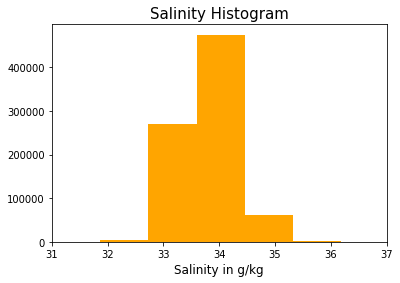

In [42]:
plt.hist(model_data['Salnty'],color='orange')
plt.xlim([31,37])
plt.xlabel("Salinity in g/kg",fontsize=12)
plt.title("Salinity Histogram",fontsize=15)
plt.show()

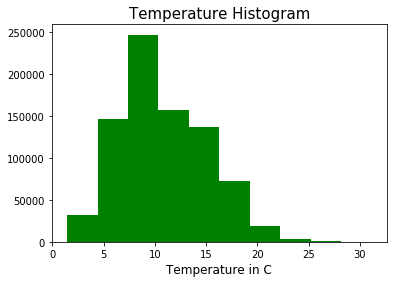

In [45]:
plt.hist(model_data['T_degC'],color='green')
plt.xlabel("Temperature in C",fontsize=12)
plt.title("Temperature Histogram",fontsize=15)
plt.show()

### Scatter Plots

-> Temperature and Salinity

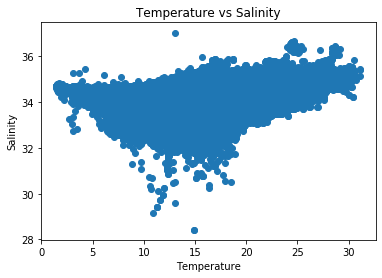

In [20]:
plt.scatter(x,y)
plt.xlabel("Temperature")
plt.ylabel("Salinity")
plt.title("Temperature vs Salinity",loc="Center")
plt.show()

### Salinty Distribution

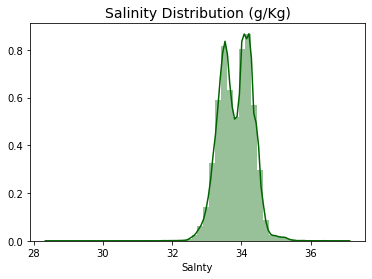

In [21]:
plt.title('Salinity Distribution (g/Kg)', fontsize=14)
sns.distplot(model_data['Salnty'], color='darkgreen')
plt.show()

Above Distribution graph has unnecessary range on x-axis. So, we use **.xlim()** function to get better visualization

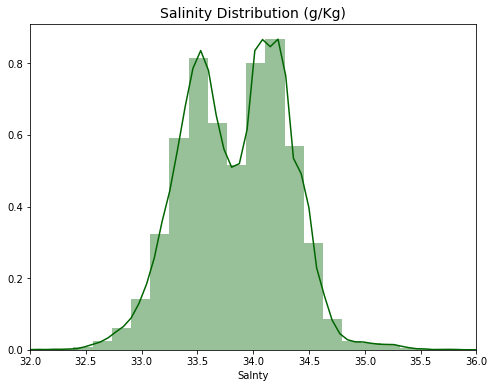

In [22]:
plt.figure(figsize=(8,6))
plt.xlim([32, 36])
plt.title('Salinity Distribution (g/Kg)', fontsize=14)
sns.distplot(model_data['Salnty'], color='darkgreen')
plt.show()

# Model Algorithm Starts

### First we split our data in train and test using train_test_split function

In [23]:
train_x , test_x , train_y , test_y = train_test_split( x , y , test_size = 0.25 )

In [24]:
print("Size of Train and Test Varibales. ")
print()
print( f"Size of train_x : {train_x .shape} and test_x : {test_x .shape}" )
print( f"Size of train_y : {train_y .shape} and test_y : {test_y .shape}" )

Size of Train and Test Varibales. 

Size of train_x : (610685, 1) and test_x : (203562, 1)
Size of train_y : (610685,) and test_y : (203562,)


Scatter Plot of the train and test Data set

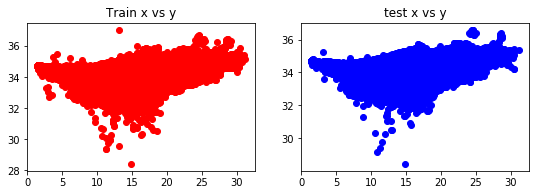

In [25]:
fig = plt.figure(figsize=(9,6)) 

plt1 = fig.add_subplot(221) 
plt2 = fig.add_subplot(222) 


plt1.scatter(train_x, train_y, color ='r') 
plt1.set_title('Train x vs y') 

plt2.scatter(test_x, test_y, color ='b') 
plt2.set_title('test x vs y') 

plt.show()

### We import Linear Regression model from linear_model Module

In [26]:
LReg = linear_model .LinearRegression() 

### Now we fit LReg model using train set

In [27]:
LReg .fit( train_x , train_y )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Now LReg Model is ready.

We get linear coefficient (Slope) and y-intercept of the Best fit line of the model

In [28]:
print( f"Coefficient is {LReg.coef_[0]}" )
print( f"Y-intercept is {LReg.intercept_}" )

Coefficient is -0.05529776007188992
Y-intercept is 34.44184829467626


### Predicting Vaues for test_x

In [29]:
pred_y=LReg.predict(test_x)

Comparing some values of Actual test y and predicted y.

In [30]:
comp_df = pd.DataFrame({'Actual values':test_y,'Predicted values':pred_y})
comp_df.head(10)

,Actual values,Predicted values
0,33.452,33.675974
1,33.990,33.275066
2,33.710,33.995042
3,34.390,34.065271
4,34.770,33.657726
5,33.096,33.643736
6,34.201,34.091813
7,32.959,33.699199
8,34.452,34.202962
9,33.610,33.914308


### Visualizing the train data , test data and complete data with best fit line

C:\Users\SS\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


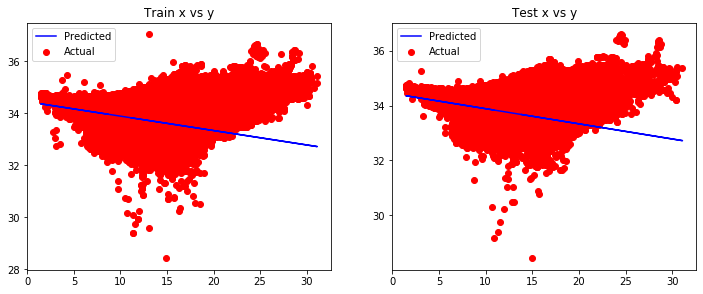

In [31]:
fig = plt.figure(figsize=(12,10)) 

plt1 = fig.add_subplot(221) 
plt2 = fig.add_subplot(222) 


plt1.scatter(train_x, train_y, color ='r',label = 'Actual') 
plt1.plot(train_x, LReg.predict(train_x), color= 'b', label = 'Predicted')
plt1.set_title('Train x vs y')
plt1.legend()


plt2.scatter(test_x, test_y, color ='r',label = 'Actual') 
plt2.plot(test_x, LReg.predict(test_x), color= 'b', label = 'Predicted')
plt2.set_title('Test x vs y')
plt2.legend()


plt.show()

C:\Users\SS\Anaconda3\lib\site-packages\IPython\core\events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\SS\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


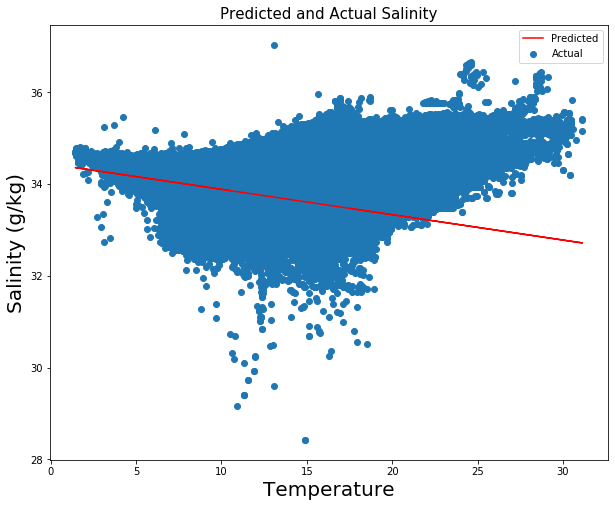

In [32]:
plt.figure(figsize=(10,8)) 
plt.scatter(x, y, label = 'Actual')
plt.plot(x, LReg.predict(x), color= 'red', label = 'Predicted')
plt.xlabel('Temperature', fontsize = 20)
plt.ylabel('Salinity (g/kg)', fontsize = 20)
plt.title('Predicted and Actual Salinity', fontsize = 15)
plt.legend()

# Evaluation of LReg Model

Here, we evaluate the model using some error function and score functions

In [39]:
LReg.score(train_x,train_y)

0.25594067417996136

In [33]:
r2s = r2_score(test_y,pred_y)
print( f"r2 Score is {r2s}")

r2 Score is 0.2533518769591825


In [34]:
mae = mean_absolute_error(test_y,pred_y)
print( f"Mean Absolute Error is {mae}")

Mean Absolute Error is 0.27953594116030417


In [35]:
mse = mean_squared_error(test_y,pred_y)
print( f"Mean Squared Error is {mse}")

Mean Squared Error is 0.159232601571436


In [36]:
me = max_error(test_y,pred_y)
print( f"Max Error is {me}")

Max Error is 5.186358692004379


In [37]:
error_df = pd.DataFrame({'r2 score': r2s , 'Mean Absolute Error' : mae , 'Mean Squared Error' : mse , 'Max Error' : me},index=[0])
error_df

,r2 score,Mean Absolute Error,Mean Squared Error,Max Error
0,0.253352,0.279536,0.159233,5.186359


# Conclusion

### From above table it is clear that this LReg Model .i.e., Univariate Linear Regression is not best for this Dataset or to predict Salinity of water on basis of only Temperature.